In [1]:
#import the libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#split the dataset into train set and test set

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
#normalise the dataset
x_train = x_train/255
x_test = x_test/255

In [4]:
print(x_train.shape)

(60000, 28, 28)


True label: 4


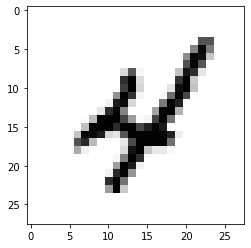

In [5]:
index = 9
print('True label: {}'.format(y_train[index]) )
plt.imshow(x_train[index], cmap='Greys')
plt.show()

In [6]:
#converting the dataset into the right shape

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

print('Final shape of input tensor {}'.format(x_train.shape))

Final shape of input tensor (60000, 28, 28, 1)


In [7]:
#printing a shape of a single image in the dataset

x_train[0].shape

(28, 28, 1)

# BUILDING THE MODEL 

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=(3,3), 
                                 strides=(1,1),
                                 padding='valid',
                                 activation='relu', 
                                 input_shape=(28,28,1)),
        
    
           tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
           tf.keras.layers.Conv2D(filters=64,  kernel_size=(3,3),  strides=(1,1), padding='valid', activation='relu'), 
           tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
           tf.keras.layers.Flatten(),
           tf.keras.layers.Dense(128,activation=tf.nn.relu),
           tf.keras.layers.Dropout(0.5),
           tf.keras.layers.Dense(10, activation=tf.nn.softmax),
            ])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [10]:
#compile

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [11]:
#Training the dataset

History = model.fit(x_train,y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 168s 86ms/step - loss: 0.2027 - sparse_categorical_accuracy: 0.9375 - val_loss: 0.0468 - val_sparse_categorical_accuracy: 0.9851
Epoch 2/10
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0758 - sparse_categorical_accuracy: 0.9773 - val_loss: 0.0331 - val_sparse_categorical_accuracy: 0.9883
Epoch 3/10
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0561 - sparse_categorical_accuracy: 0.9834 - val_loss: 0.0305 - val_sparse_categorical_accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 208s 111ms/step - loss: 0.0464 - sparse_categorical_accuracy: 0.9860 - val_loss: 0.0311 - val_sparse_categorical_accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 174s 93ms/step - loss: 0.0385 - sparse_categorical_accuracy: 0.9879 - val_loss: 0.0263 - val_sparse_categorical_accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 183s 97ms/step - l

In [12]:
History.history

{'loss': [0.2027198076248169,
  0.07584662735462189,
  0.056110210716724396,
  0.04642819985747337,
  0.03849557414650917,
  0.032654013484716415,
  0.028679756447672844,
  0.025788813829421997,
  0.02282884530723095,
  0.02053752914071083],
 'sparse_categorical_accuracy': [0.9374666810035706,
  0.977316677570343,
  0.9834499955177307,
  0.985966682434082,
  0.9879166483879089,
  0.9893666505813599,
  0.9908333420753479,
  0.9920333623886108,
  0.9925833344459534,
  0.9936166405677795],
 'val_loss': [0.04675044119358063,
  0.033051423728466034,
  0.03052826225757599,
  0.03108828514814377,
  0.026266632601618767,
  0.027432888746261597,
  0.02562890388071537,
  0.026061123237013817,
  0.02444096840918064,
  0.023951897397637367],
 'val_sparse_categorical_accuracy': [0.9850999712944031,
  0.9883000254631042,
  0.9900000095367432,
  0.9909999966621399,
  0.9909999966621399,
  0.9907000064849854,
  0.9921000003814697,
  0.9922000169754028,
  0.9925000071525574,
  0.9936000108718872]}

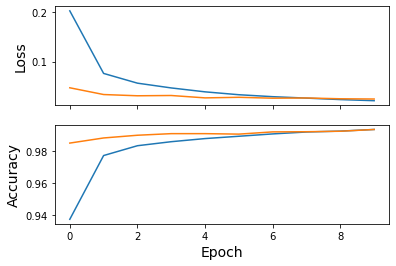

In [13]:
#Evaluate

history_dict = History.history
history_dict.keys()
loss_values = history_dict['loss']
acc_values = history_dict['sparse_categorical_accuracy']
epochs = range(1, len(loss_values) + 1)

fig, axes = plt.subplots(2, sharex=True)
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(loss_values)
axes[0].plot(history_dict['val_loss'])
axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(acc_values)
axes[1].plot(history_dict['val_sparse_categorical_accuracy'])
plt.show()

In [14]:
predictions = model.predict(x_test)
y_hat = np.argmax(predictions[7])
print(y_hat)

313/313 [==============================] - 14s 40ms/step
9
